In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, ScalarFormatter

In [27]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.8, palette='Set2')

In [79]:
seed = 5

In [138]:
from desisim.io import read_basis_templates
for obj in ('BGS', 'ELG', 'LRG', 'STAR'):
    _, _, mm = read_basis_templates(obj)
    print(obj, len(mm))

INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/bgs_templates_v2.2.fits
BGS 7636
INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/elg_templates_v2.1.fits
ELG 7735
INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/lrg_templates_v2.1.fits
LRG 3000
INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/star_templates_v3.0.fits
STAR 9649


In [123]:
from desisim.templates import ELG, BGS, STD
spec = dict()
for obj, T in zip( ('ELG', 'BGS', 'STAR'), (ELG, BGS, STD) ):
    if obj == 'STAR':
        flux, wave, meta, objmeta = T(maxwave=1.1e4).make_templates(
            1, seed=seed, magrange=(20, 20), nocolorcuts=True)
    else:
        flux, wave, meta, objmeta = T(maxwave=1.1e4).make_templates(
            1, seed=seed, magrange=(20, 20), nocolorcuts=True, 
            zrange=(0.1, 1.0))

    spec[obj] = flux
    spec['{}_meta'.format(obj)] = meta
    spec['{}_objmeta'.format(obj)] = objmeta

INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/elg_templates_v2.1.fits
INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/bgs_templates_v2.2.fits
INFO:io.py:945:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v3.0/star_templates_v3.0.fits


In [135]:
spec['ELG_meta']

TARGETID,OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,MAGFILTER,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2
,,,,,,mag,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies
int64,str10,str10,int16,int64,float32,float32,str15,float32,float32,float32,float32,float32
0,ELG,,7119,953453411,0.7882796,20.0,decam2014-r,4.0878243,10.0,35.302082,116.30384,79.49523


In [133]:
def specplot():
    fig, ax = plt.subplots()
    for obj in np.atleast_1d('ELG'):
    #for obj in ('ELG', 'BGS', 'STAR'):
        ax.plot(wave, spec[obj][0, :], label=obj, alpha=0.75)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Observed-Frame Wavelength (A)')
    ax.set_ylabel('Flux')
    ax.yaxis.set_major_formatter(plt.NullFormatter())        
    ax.xaxis.set_major_locator(MultipleLocator(2000))
    sns.despine(fig)
    #ax.legend(loc='upper right', fontsize=12)
    fig.savefig('spec.png')    

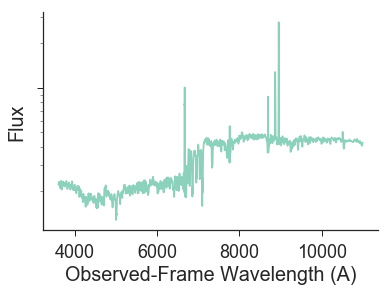

In [134]:
specplot()

In [51]:
from desitarget.mock.mockmaker import BGSMaker, LRGMaker, ELGMaker, QSOMaker, LYAMaker
data = dict()
for obj, Maker in zip( ('BGS', 'LRG', 'ELG', 'QSO', 'LYA'),
                       (BGSMaker, LRGMaker, ELGMaker, QSOMaker, LYAMaker) ):
    M = Maker()
    data[obj] = M.read(only_coords=True)

INFO:mockmaker.py:2114:readmock: Reading the whole DESI footprint with nside = 64.
INFO:mockmaker.py:2176:readmock: Trimmed to 41561531 BGSs in 18404 healpixel(s).
INFO:mockmaker.py:1214:readmock: Reading the whole DESI footprint with nside = 64.
INFO:mockmaker.py:210:_get_radec: Reading /Users/ioannis/work/desi/mocks/DarkSky/v1.0.1/lrg_0_inpt.fits
INFO:mockmaker.py:215:_get_radec: Assigning healpix pixels with nside = 64.
INFO:mockmaker.py:1249:readmock: Trimmed to 11916579 LRGs in 18404 healpixel(s)
INFO:mockmaker.py:1214:readmock: Reading the whole DESI footprint with nside = 64.
INFO:mockmaker.py:210:_get_radec: Reading /Users/ioannis/work/desi/mocks/DarkSky/v1.0.1/elg_0_inpt.fits
INFO:mockmaker.py:215:_get_radec: Assigning healpix pixels with nside = 64.
INFO:mockmaker.py:1249:readmock: Trimmed to 74962311 ELGs in 18404 healpixel(s)
INFO:mockmaker.py:1214:readmock: Reading the whole DESI footprint with nside = 64.
INFO:mockmaker.py:210:_get_radec: Reading /Users/ioannis/work/desi/

In [56]:
def zhist():
    zrange = (0, 4)
    fig, ax = plt.subplots(figsize=(10, 7))
    for obj, label in zip( ('BGS', 'LRG', 'ELG', 'QSO', 'LYA'),
                           ('BGS (MXXL/v0.0.4)', 'LRG (DarkSky v1.0.1)', 
                            'ELG (DarkSky/v1.0.1)', 'QSO/Tracer (DarkSky/v1.0.1)', 
                            'QSO/LYA (London/v4.0)') ):
        ax.hist(data[obj]['Z'], bins=100, range=zrange, density=True,
               alpha=0.75, label=label)
    ax.set_xlim(zrange)
    ax.legend(loc='upper right')
    ax.set_xlabel('Redshift')
    ax.set_ylabel('Normalized Number')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    fig.savefig('zhist.png')

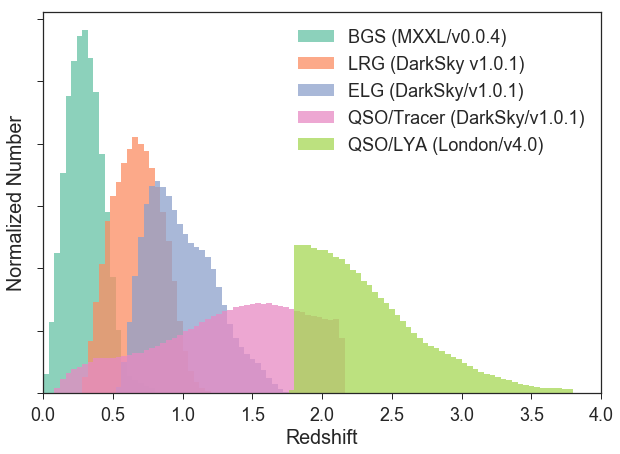

In [57]:
zhist()

In [58]:
QSOMaker().qamock_sky(data['QSO'], nozhist=True, png='qasky_qso.png')

Writing qasky_qso.png
